# TP APPLI : Détection astrophysique

### Binôme : Orane Vernet, Diane CHOUNLAMOUNTRY

Date : 08/03/2024

In [504]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import scipy.stats as st

### 2.1 Upper limit : Neyman-Pearson (LR) with the true profile

In [505]:
theta = np.fromfile('./Data/theta.dat',dtype=float)

Text(0.5, 1.0, 'Noiseless planetary transit profile')

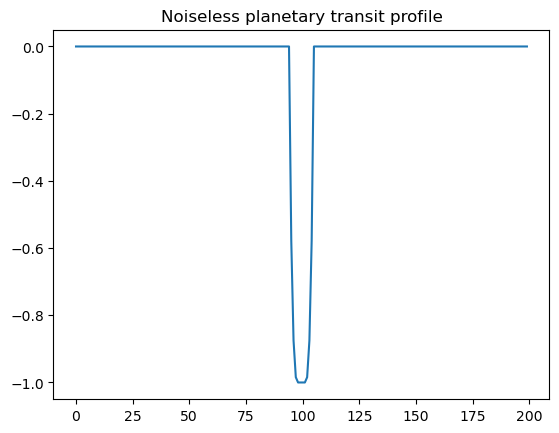

In [506]:
##Affichage du profil

plt.plot(theta)
plt.title('Noiseless planetary transit profile')

In [507]:
def phi(x) :
    #return(np.exp(-x^2/2)/sqrt(2*np.pi))
    return st.norm.cdf(x)

**Calculs théoriques**

In [508]:
Xi= np.linspace(-10,15,1000)

## Calcul théorique de PFA et PDET
PFA=1-phi(Xi/np.linalg.norm(theta))
PDET=1-phi((Xi-np.linalg.norm(theta)**2*np.ones(Xi.shape))/np.linalg.norm(theta))

**Calculs empiriques (Monte Carlo)**

In [509]:
def f1(theta,M): 
    return np.dot(theta,M)

In [510]:
## Calculs pour H0

def f_PFA_emp(f,theta):

    n_MC = 1000 # nombre de simulations

    M0 = np.random.randn(200, n_MC)

    lr_test = f(theta,M0)
    xi_min = min(lr_test)
    xi_max = max(lr_test)

    xi_verif = np.linspace(xi_min, xi_max, 1000)

    PFA_emp = []
    for xi in xi_verif:
        lr_test_cop=lr_test.copy()
        lr_test_cop[lr_test>xi]=1
        lr_test_cop[lr_test<xi]=0
        x=sum(lr_test_cop)/n_MC
        PFA_emp.append(x)
        
    return xi_verif, PFA_emp


In [511]:
## Calculs pour H1

def f_PDET_emp(f,theta,thetat):
    
    n_MC = 1000 # nombre de simulations
    
    theta_colonne = np.array(theta.copy())

    theta_colonne = theta_colonne.reshape((200,1))

    theta_matrix = np.tile(theta_colonne, n_MC)

    
    M0 = np.random.randn(200, n_MC)

    M1 = M0 + theta_matrix

    lr_test1 = f(thetat,M1)
    xi_min1 = min(lr_test1)
    xi_max1 = max(lr_test1)

    xi_verif1 = np.linspace(xi_min1, xi_max1, 1000)

    PDET_emp = []
    for xi in xi_verif1:
        lr_test_cop1=lr_test1.copy()
        lr_test_cop1[lr_test1>xi]=1
        lr_test_cop1[lr_test1<xi]=0
        x=sum(lr_test_cop1)/n_MC
        PDET_emp.append(x)
        
    return(xi_verif1,PDET_emp)


In [512]:
xi_verif, PFA_emp=f_PFA_emp(f1,theta)
xi_verif1,PDET_emp=f_PDET_emp(f1,theta,theta)

**Courbes**

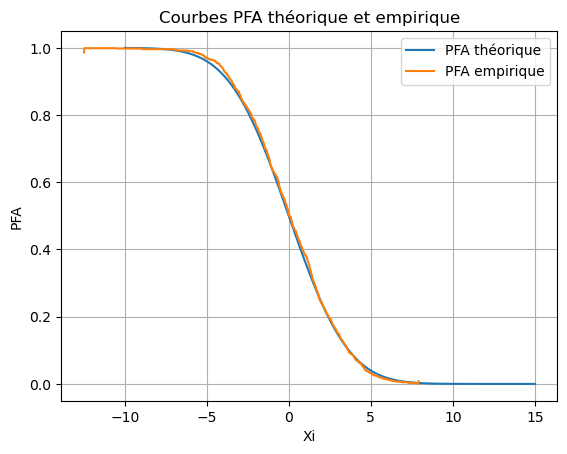

In [513]:
plt.plot(Xi,PFA, label='PFA théorique')
plt.plot(xi_verif,PFA_emp, label='PFA empirique')
plt.xlabel('Xi')
plt.ylabel('PFA')
plt.title('Courbes PFA théorique et empirique')
plt.legend()
plt.grid(True)

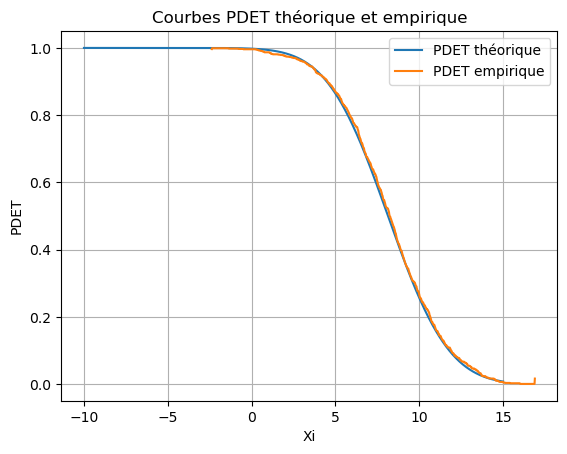

In [514]:
plt.plot(Xi,PDET,label='PDET théorique')
plt.plot(xi_verif1,PDET_emp,label="PDET empirique")
plt.xlabel('Xi')
plt.ylabel('PDET')
plt.title('Courbes PDET théorique et empirique')
plt.legend()
plt.grid(True)

**Courbe ROC**

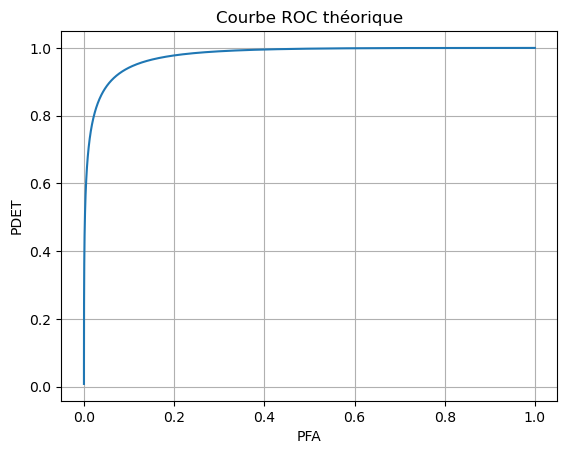

In [515]:
plt.plot(PFA,PDET)
plt.xlabel('PFA')
plt.ylabel('PDET')
plt.title('Courbe ROC théorique')
plt.grid(True)

## 2.2 LRT with model error : boxcar approximation of transit’s shape

In [516]:
thetat = np.fromfile('./Data/thetat.dat',dtype=float)
thetat_vec=np.array(thetat)
thetat_vec=thetat.reshape((200,1))

**Calculs théoriques**

In [517]:
Xi= np.linspace(-10,16,1000)

## Calcul théorique de PFA et PDET
PFA2=1-phi(Xi/np.linalg.norm(thetat))
PDET2=1-phi((Xi-np.dot(theta,thetat)*np.ones(Xi.shape))/np.linalg.norm(thetat))

**Calculs empiriques**

In [518]:
xi_verif,PFA_emp2=f_PFA_emp(f1,thetat)
xi_verif1,PDET_emp2=f_PDET_emp(f1,theta,thetat)

**Courbes**

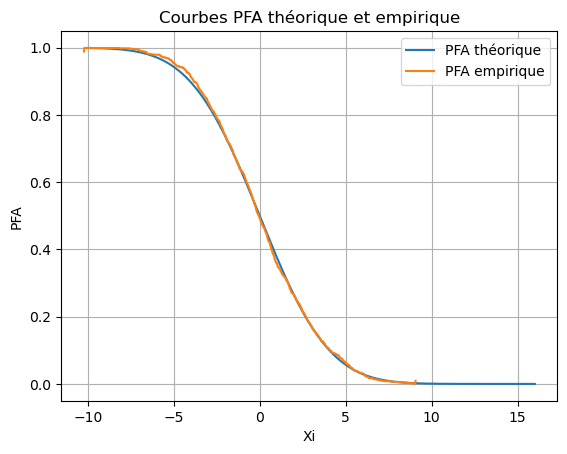

In [519]:
plt.plot(Xi,PFA2, label='PFA théorique')
plt.plot(xi_verif,PFA_emp2, label='PFA empirique')
plt.xlabel('Xi')
plt.ylabel('PFA')
plt.title('Courbes PFA théorique et empirique')
plt.legend()
plt.grid(True)

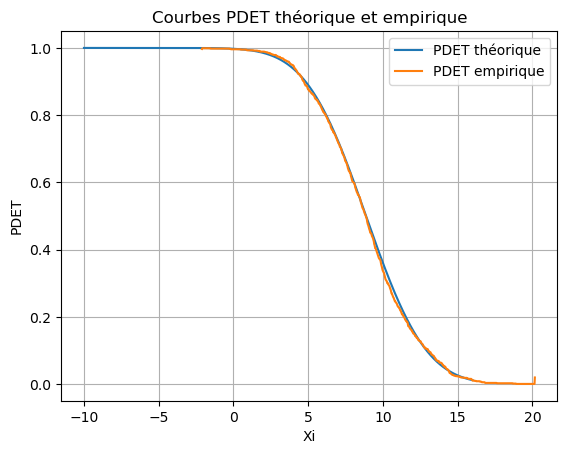

In [520]:
plt.plot(Xi,PDET2,label='PDET théorique')
plt.plot(xi_verif1,PDET_emp2,label="PDET empirique")
plt.xlabel('Xi')
plt.ylabel('PDET')
plt.title('Courbes PDET théorique et empirique')
plt.legend()
plt.grid(True)

On constate que les courbes PDET théorique et empirique ne se superpose pas parfaitement bien pour cette méthode. 

**Courbe ROC**

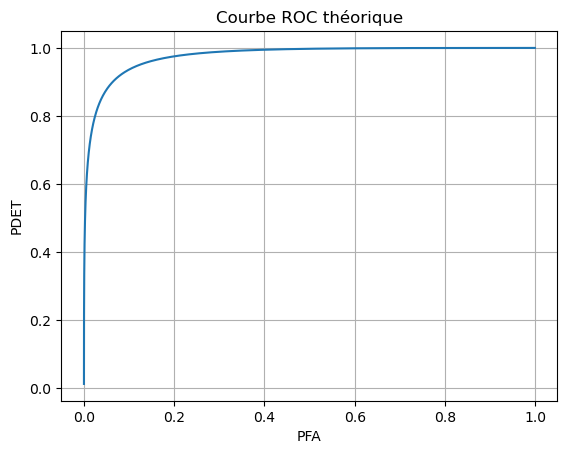

In [521]:
plt.plot(PFA2,PDET2)
plt.xlabel('PFA')
plt.ylabel('PDET')
plt.title('Courbe ROC théorique')
plt.grid(True)

## 2.3 Boxcar with unknown but positive amplitude, known position

In [522]:
g=thetat/norm(thetat)
alpha=1

**Calculs théoriques**

In [523]:
Xi= np.linspace(-5,5,1000)

## Calcul théorique de PFA et PDET
PFA3=1-phi(Xi)
PDET3=1-phi(Xi-np.dot(g,theta)*np.ones((Xi.shape)))

**Calculs empiriques**

In [524]:
xi_verif,PFA_emp3=f_PFA_emp(f1,g)
xi_verif1,PDET_emp3=f_PDET_emp(f1,theta,g)

**Courbes**

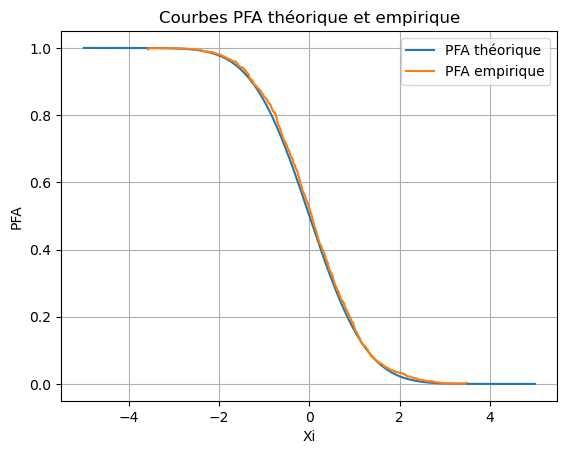

In [525]:
plt.plot(Xi,PFA3, label='PFA théorique')
plt.plot(xi_verif,PFA_emp3, label='PFA empirique')
plt.xlabel('Xi')
plt.ylabel('PFA')
plt.title('Courbes PFA théorique et empirique')
plt.legend()
plt.grid(True)

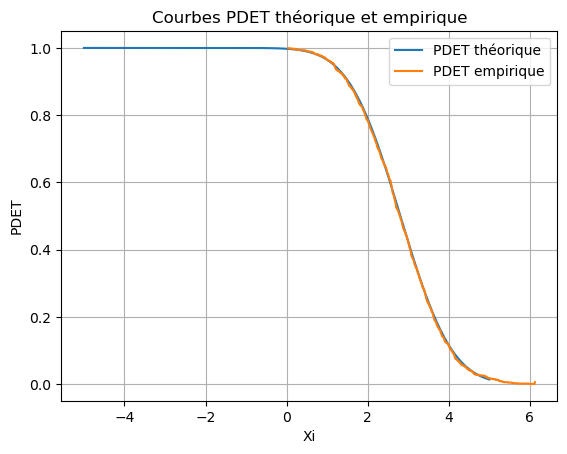

In [526]:
plt.plot(Xi,PDET3,label='PDET théorique')
plt.plot(xi_verif1,PDET_emp3,label="PDET empirique")
plt.xlabel('Xi')
plt.ylabel('PDET')
plt.title('Courbes PDET théorique et empirique')
plt.legend()
plt.grid(True)

**Courbe ROC**

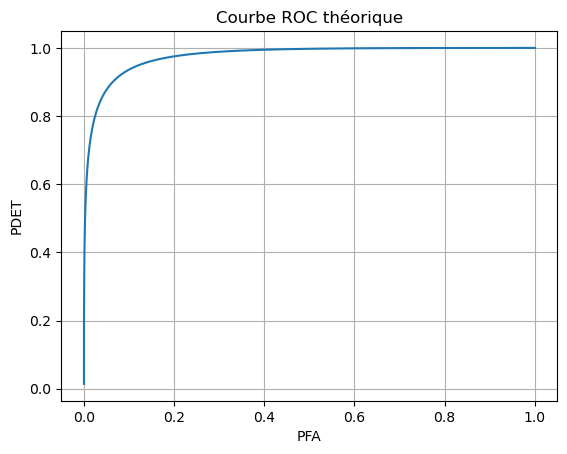

In [527]:
plt.plot(PFA3,PDET3)
plt.xlabel('PFA')
plt.ylabel('PDET')
plt.title('Courbe ROC théorique')
plt.grid(True)

## 2.4 Boxcar with unknown amplitude and known position

**Calculs théoriques**

In [528]:
def phi2(x) :
    return st.chi2.cdf(x,1)

In [529]:
Xi= np.linspace(0,15,1000)
lamb = np.dot(g,theta)**2

## Calcul théorique de PFA et PDET
PFA4=1-phi2(Xi)
PDET4=1-st.ncx2.cdf(Xi,df=1,nc = lamb )

**Calculs empiriques**

In [530]:
def f4(theta,M):
    return (np.dot(theta,M))**2

In [531]:
xi_verif,PFA_emp4=f_PFA_emp(f4,g)
xi_verif1,PDET_emp4=f_PDET_emp(f4,theta,g)

**Courbes**

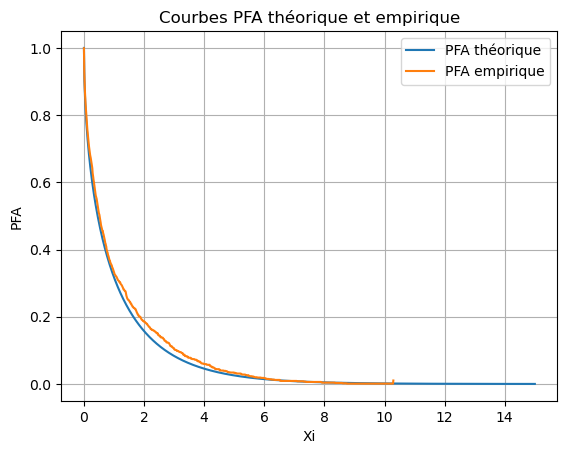

In [532]:
plt.plot(Xi,PFA4, label='PFA théorique')
plt.plot(xi_verif,PFA_emp4, label='PFA empirique')
plt.xlabel('Xi')
plt.ylabel('PFA')
plt.title('Courbes PFA théorique et empirique')
plt.legend()
plt.grid(True)

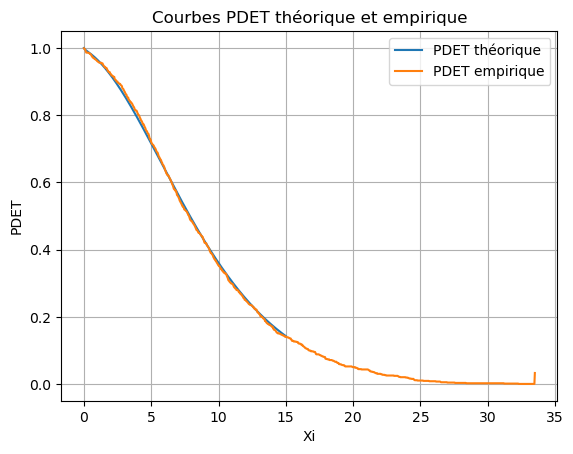

In [533]:
plt.plot(Xi,PDET4,label='PDET théorique')
plt.plot(xi_verif1,PDET_emp4,label="PDET empirique")
plt.xlabel('Xi')
plt.ylabel('PDET')
plt.title('Courbes PDET théorique et empirique')
plt.legend()
plt.grid(True)

**Courbe ROC**

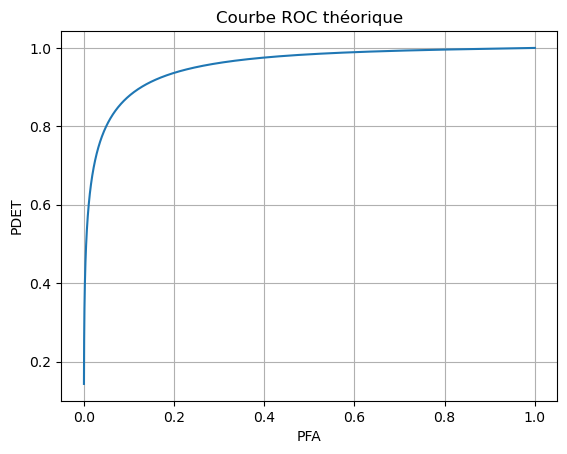

In [534]:
plt.plot(PFA4,PDET4)
plt.xlabel('PFA')
plt.ylabel('PDET')
plt.title('Courbe ROC théorique')
plt.grid(True)

## 2.5 Boxcar shape, unknown but positive amplitude, unknown position

In [535]:
Dg = np.load('./Data/Dg.npy')
i= 5 #à choisir entre 0 et 208

In [536]:
## Vérification
nb_ligne=8
print(Dg.shape)
ligne=Dg[:,nb_ligne]
print(norm(ligne))

(200, 209)
1.0


**Calculs empiriques**

In [537]:
## Pour H0

n_MC = 1000 # nombre de simulations

M0 = np.random.randn(200, n_MC)

Dg_transpose=np.transpose(Dg)
lr_test=np.max(np.dot(Dg_transpose,M0),axis=0)

print(lr_test.shape)

xi_min = min(lr_test)
xi_max = max(lr_test)

xi_verif = np.linspace(xi_min, xi_max, 1000)


PFA_emp5 = []
for xi in xi_verif:
    lr_test_cop=lr_test.copy()
    lr_test_cop[lr_test>xi]=1
    lr_test_cop[lr_test<xi]=0
    x=sum(lr_test_cop)/n_MC
    PFA_emp5.append(x)

(1000,)


In [538]:
n_MC = 1000 # nombre de simulations
    
theta_colonne = np.array(theta.copy())

theta_colonne = theta_colonne.reshape((200,1))

theta_matrix = np.tile(theta_colonne, n_MC)

    
M0 = np.random.randn(200, n_MC)

M1 = M0 + theta_matrix

Dg_transpose=np.transpose(Dg)

lr_test1=np.max(np.dot(Dg_transpose,M1),axis=0)

xi_min1 = min(lr_test1)
xi_max1 = max(lr_test1)

xi_verif1 = np.linspace(xi_min1, xi_max1, 1000)

PDET_emp5 = []
for xi in xi_verif1:
    lr_test_cop1=lr_test1.copy()
    lr_test_cop1[lr_test1>xi]=1
    lr_test_cop1[lr_test1<xi]=0
    x=sum(lr_test_cop1)/n_MC
    PDET_emp5.append(x)

**Courbes**

Text(0, 0.5, 'PFA')

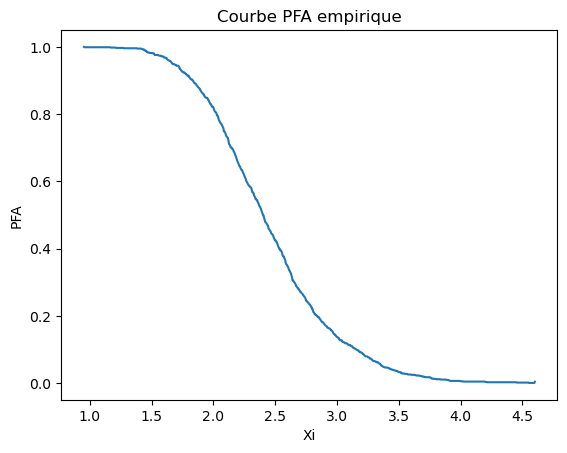

In [539]:
plt.plot(xi_verif,PFA_emp5)
plt.title('Courbe PFA empirique')
plt.xlabel('Xi')
plt.ylabel('PFA')

Text(0, 0.5, 'PDET')

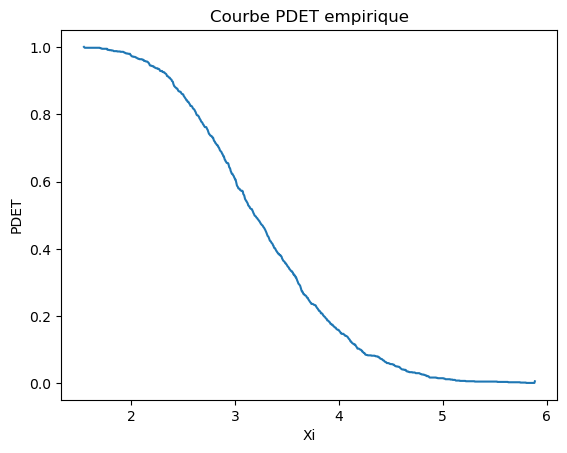

In [540]:
plt.plot(xi_verif1,PDET_emp5)
plt.title('Courbe PDET empirique')
plt.xlabel('Xi')
plt.ylabel('PDET')

## Comparaison courbes ROC des 4 premières méthodes

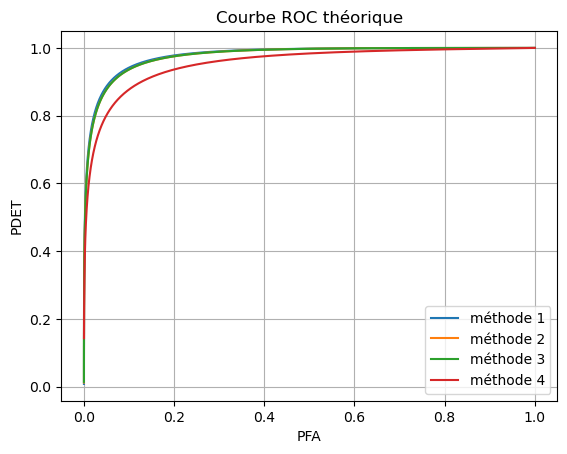

In [541]:
plt.plot(PFA,PDET,label='méthode 1')
plt.plot(PFA2,PDET2,label='méthode 2')
plt.plot(PFA3,PDET3,label='méthode 3')
plt.plot(PFA4,PDET4,label='méthode 4')
plt.xlabel('PFA')
plt.ylabel('PDET')
plt.title('Courbe ROC théorique')
plt.grid(True)
plt.legend()

On constate que la méthode 4 est moins bien mais les autres méthodes semblent équivalentes.